In [188]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as p
import spinmob as s
import numpy as np
%matplotlib osx

In [189]:
"""def lorentz(x, x0,g0, x1,g1, x2,g2, x3,g3, x4,g4, x5,g5, x6,g6, x7,g7, x8,g8):
    y=0
    g0_sqr = np.square(g0)
    denom = np.pi * g0 * ((x-x0)**2 + g0_sqr)
    y += g0_sqr/denom
    
    g1_sqr = np.square(g1)
    denom = np.pi * g1 * ((x-x1)**2 + g1_sqr)
    y += g1_sqr/denom
    
    g2_sqr = np.square(g2)
    denom = np.pi * g2 * ((x-x2)**2 + g2_sqr)
    y += g2_sqr/denom
    
    g3_sqr = np.square(g3)
    denom = np.pi * g3 * ((x-x3)**2 + g3_sqr)
    y += g3_sqr/denom
    
    g4_sqr = np.square(g4)
    denom = np.pi * g4 * ((x-x4)**2 + g4_sqr)
    y += g4_sqr/denom
    
    g5_sqr = np.square(g5)
    denom = np.pi * g5 * ((x-x5)**2 + g5_sqr)
    y += g5_sqr/denom
    
    g6_sqr = np.square(g6)
    denom = np.pi * g6 * ((x-x6)**2 + g6_sqr)
    y += g6_sqr/denom
    
    g7_sqr = np.square(g7)
    denom = np.pi * g7 * ((x-x7)**2 + g7_sqr)
    y += g7_sqr/denom
    
    g8_sqr = np.square(g8)
    denom = np.pi * g8 * ((x-x8)**2 + g8_sqr)
    y += g8_sqr/denom
    return y"""

def lorentz(x, x0,g0, x1,g1, x2,g2, x3,g3, x4,g4, x5,g5):
    y=0
    g0_sqr = np.square(g0)
    denom = np.pi * g0 * ((x-x0)**2 + g0_sqr)
    y += g0_sqr/denom
    
    g1_sqr = np.square(g1)
    denom = np.pi * g1 * ((x-x1)**2 + g1_sqr)
    y += g1_sqr/denom
    
    g2_sqr = np.square(g2)
    denom = np.pi * g2 * ((x-x2)**2 + g2_sqr)
    y += g2_sqr/denom
    
    g3_sqr = np.square(g3)
    denom = np.pi * g3 * ((x-x3)**2 + g3_sqr)
    y += g3_sqr/denom
    
    g4_sqr = np.square(g4)
    denom = np.pi * g4 * ((x-x4)**2 + g4_sqr)
    y += g4_sqr/denom
    
    g5_sqr = np.square(g5)
    denom = np.pi * g5 * ((x-x5)**2 + g5_sqr)
    y += g5_sqr/denom
    
    return y

In [190]:
y = np.load('data/30_300_0.5.npy')/95.6
x = np.linspace(30,300,len(y))[128:200]
y = y[128:200]

In [191]:
np.where(x==95)

(array([2]),)

In [208]:
#fitter = s.data.fitter(f = lorentz, 
#                       p = 'x0=106, g0=4, x1=103, g1=4, x2=102, g2=4, x3=107, g3=4, x4=108, g4=4, x5=110, g5=4, x6=85, g6=4, x7=79, g7=1, x8=86, g8=9', plot_guess=False, autoplot=False)
fitter = s.data.fitter(f = lorentz, 
                       p = 'x0=106, g0=4, x1=103, g1=4, x2=102, g2=4, x3=107, g3=4, x4=108, g4=4, x5=110, g5=4', plot_guess=False, autoplot=False)
fitter.set_data(xdata=x, ydata=y, eydata=0.001)
fitter.fit()
fitter.plot()


SETTINGS
  autoplot        False
  coarsen         [1]
  first_figure    0
  fpoints         [1000]
  plot_bg         [True]
  plot_ey         [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          [False]
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '+', 'color': 'b', 'ls': ''}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [129.5]
  xmin            [94.0]
  xscale          ['linear']
  ylabel          [None]
  ymax            [0.37740585774058577]
  ymin            [0.028451882845188289]
  yscale          ['linear']

CONSTANTS

GUESS (reduced chi squared = [ 4320.])
  x0         = 106.0
  g0         = 4.0
  x1         = 103.0
  g1         = 4.0
  x2         = 102.0
  g2         = 4.0
  x3         = 107.0
  g3         = 4.0
  

In [209]:
fig=p.gcf()
a0 = fig.axes[0]
a1 = fig.axes[1]
a0.set_title('')
a1.set_xlabel('Frequency (f)')
a1.set_ylabel('Amplitude (V)')
p.savefig('fit_resonance.pdf',dpi=70,bbox_inches='tight')

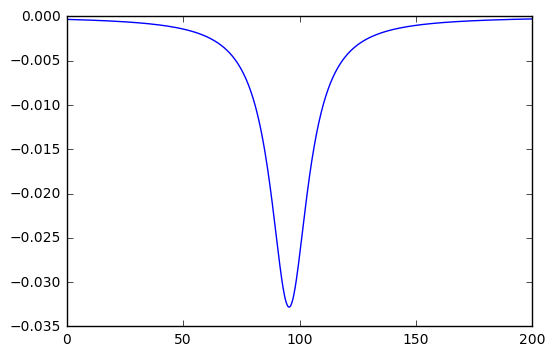

In [165]:
def one_lorentz(x, x0, g0):
    g0_sqr = np.square(g0)
    denom = np.pi * g0 * ((x-x0)**2 + g0_sqr)
    return g0_sqr/denom

p.figure()
xone = np.linspace(0,200,1000)
onelore = one_lorentz(xone,95.5,-9.7)
p.plot(xone,onelore)
p.show()

In [22]:
from scipy.special import wofz
def V(x, x0 ,alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz(((x-x0) + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi) + 0.025

In [185]:
ax = fig.axes[0]
ax.set_title('')
p.show()

IndexError: list index out of range